| Kolom                    | Interpretasi                                  |
| ------------------------ | --------------------------------------------- |
| Age                      | Usia                                          |
| Attrition                | Tidak bekerja lagi                            |
| BusinessTravel           | Frekuensi bepergian (travelling)              |
| DailyRate                | Upah harian                                   |
| Department               | Departmen pada pekerjaan                      |
| DistanceFromHome         | Jarak dari rumah ke tempat kerja (KM)         |
| Education                |  1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor' |
| EducationField           | Bidang pendidikan                             |
| EmployeeCount            |                                               |
| EmployeeNumber           |                                               |
| EnvironmentSatisfaction  | Kepuasan terhadap lingkungan kerja => 1 'Low' 2 'Medium' 3 'High' 4 'Very High'            |
| Gender                   | Jenis kelamin                                 |
| HourlyRate               | Upah perjam                                   |
| JobInvolvement           | Tingkat keterlibatan kerja => 1 'Low' 2 'Medium' 3 'High' 4 'Very High'                   |
| JobLevel                 | Level kesulitan pekerjaan                     |
| JobRole                  | Posisi Pekerjaan                              |
| JobSatisfaction          | Kepuasan terhadap pekerjaan => 1 'Low' 2 'Medium' 3 'High' 4 'Very High'                  |
| MaritalStatus            | Status Perkawinan                             |
| MonthlyIncome            | Income Bulanan                                |
| MonthlyRate              | Upah Bulanan                                  |
| NumCompaniesWorked       | Banyaknya perusahaan tempat bekerja           |
| Over18                   | Apakah usianya > 18?                          |
| OverTime                 | Apakah jam kerja overtime?                    |
| PercentSalaryHike        | Persentase kenaikan gaji                      |
| PerformanceRating        | Rating performa kerja  => 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'                       |
| RelationshipSatisfaction | Kepuasan terhadap relasi di tempat kerja => 1 'Low' 2 'Medium' 3 'High' 4 'Very High'      |
| StandardHours            | Standard jam kerja                            |
| StockOptionLevel         |                                               |
| TotalWorkingYears        | Lama bekerja (Tahun)                          |
| TrainingTimesLastYear    | Jumlah training tahun kemarin                 |
| WorkLifeBalance          | Keseimbangan kerja => 1 'Bad' 2 'Good' 3 'Better' 4 'Best'                           |
| YearsAtCompany           | Lama bekerja pada perusahaan                  |
| YearsInCurrentRole       | Lama bekerja pada posisi ini                  |
| YearsSinceLastPromotion  | Lama berkerja sejak kenaikan jabatan terakhir |
| YearsWithCurrManager     | Lama bekerja dengan manager saat ini          |

# __DATA PREPROCESSING__

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

sns.set_theme(style='darkgrid')
sns.set(font_scale=1.2, palette='Set1')

In [25]:
df = pd.read_excel('../Stage 1/Employee-Attrition.xlsx')

#drop fitur yang seharusnya di drop
df = df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole'], axis=1)
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
216,30,Yes,Travel_Frequently,334,Sales,26,4,Marketing,3,Female,...,5,No,15,3,3,0,5,2,0,1
606,34,No,Travel_Frequently,702,Research & Development,16,4,Life Sciences,3,Female,...,1,No,16,3,3,0,3,3,1,3
1416,38,No,Travel_Rarely,1321,Sales,1,4,Life Sciences,4,Male,...,0,No,15,3,1,2,3,3,5,8
393,34,No,Non-Travel,1381,Sales,4,4,Marketing,3,Female,...,9,No,15,3,1,1,3,3,1,2
793,28,No,Travel_Rarely,895,Research & Development,15,2,Life Sciences,1,Male,...,1,No,16,3,4,1,5,2,2,2
870,35,No,Travel_Rarely,1361,Sales,17,4,Life Sciences,3,Male,...,3,Yes,15,3,4,3,2,3,1,7
1369,28,Yes,Travel_Rarely,1475,Sales,13,2,Marketing,4,Female,...,3,Yes,11,3,4,0,0,3,2,2
1386,26,No,Travel_Rarely,157,Research & Development,1,3,Medical,3,Male,...,0,No,13,3,4,0,6,2,7,6
1331,48,No,Travel_Rarely,1224,Research & Development,10,3,Life Sciences,4,Male,...,4,No,12,3,4,0,3,3,12,9
133,41,No,Travel_Rarely,802,Sales,9,1,Life Sciences,3,Male,...,3,Yes,13,3,3,1,2,3,0,7


In [26]:
#mengubah tipe data yang tidak sesuai
for i in ['Education','EnvironmentSatisfaction','JobLevel','JobSatisfaction','PerformanceRating','JobInvolvement','RelationshipSatisfaction','WorkLifeBalance','StockOptionLevel']:
        df[i] = df[i].astype(str)

## __HANDLE MISSING VALUE__

Dataset ini tidak memiliki missing value, sehingga tidak perlu dilakukan penanganan

## __HANDLE DUPLICATED DATA__

Dataset ini tidak memiliki duplikasi

## __HANDLE OUTLIERS__

In [27]:
#membagi data dalam numerik dan kategorik
num = df.select_dtypes('number').columns
kat = df.select_dtypes('object').columns

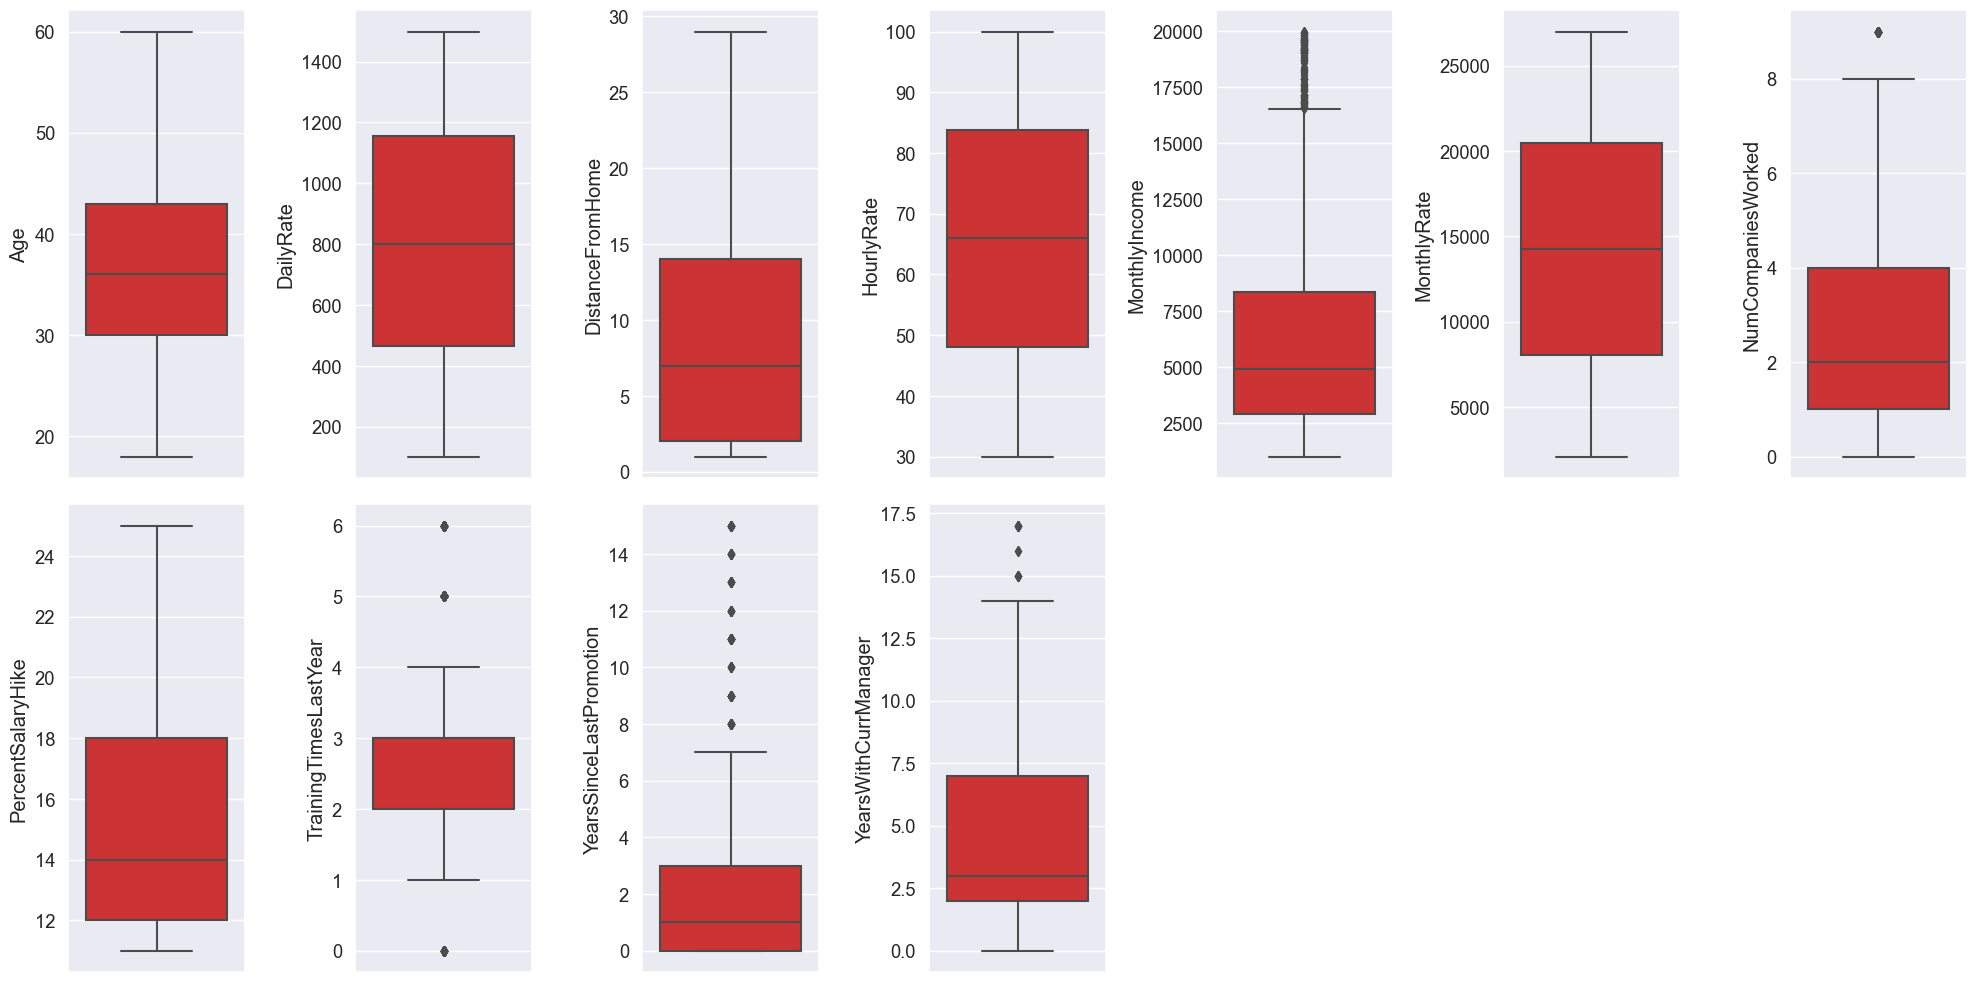

In [28]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
        plt.subplot(3,7,i+1)
        sns.boxplot(y=df[j])
        plt.tight_layout()

In [29]:
num = df.select_dtypes('number')

kolom,out,high,low = [],[],[],[]
for i in num:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        lowlimit = q1 - (1.5*iqr)
        highlimit = q3 + (iqr*1.5)

        outlier = df[ (df[i]<lowlimit) | (df[i]>highlimit)].shape[0]

        if outlier>0:
                kolom.append(i)
                out.append(outlier)
                low.append(lowlimit)
                high.append(highlimit)

data = pd.DataFrame({
        'Kolom':kolom,
        'Outliers':out,
        'Low Limit':low,
        'High Limit':high
})

data['Persentase (%)'] = round(data['Outliers']/df.shape[0]*100,2)
data

,Kolom,Outliers,Low Limit,High Limit,Persentase (%)
0,MonthlyIncome,114,-5291.0,16581.0,7.76
1,NumCompaniesWorked,52,-3.5,8.5,3.54
2,TrainingTimesLastYear,238,0.5,4.5,16.19
3,YearsSinceLastPromotion,107,-4.5,7.5,7.28
4,YearsWithCurrManager,14,-5.5,14.5,0.95


In [30]:
print(f"Persentase total outlier : {data['Outliers'].sum()/df.shape[0]*100:.2f}%")

Persentase total outlier : 35.71%


Karena persentase total outlier sangat besar yakni hingga 35,71% dari total data, maka kami akan melakukan replace value dengan median, karena semua fitur tidak berdistribusi normal, maka menggunakan median lebih baik daripada mean

[Source](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

In [31]:
for i in num:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        lowlimit = q1 - (1.5*iqr)
        highlimit = q3 + (iqr*1.5)

        outlier = df[ (df[i]<lowlimit) | (df[i]>highlimit)].shape[0]

        if outlier>0:
                df.loc[df[i]>highlimit, i ] = df[i].median()
                df.loc[df[i]<lowlimit, i ] = df[i].median()

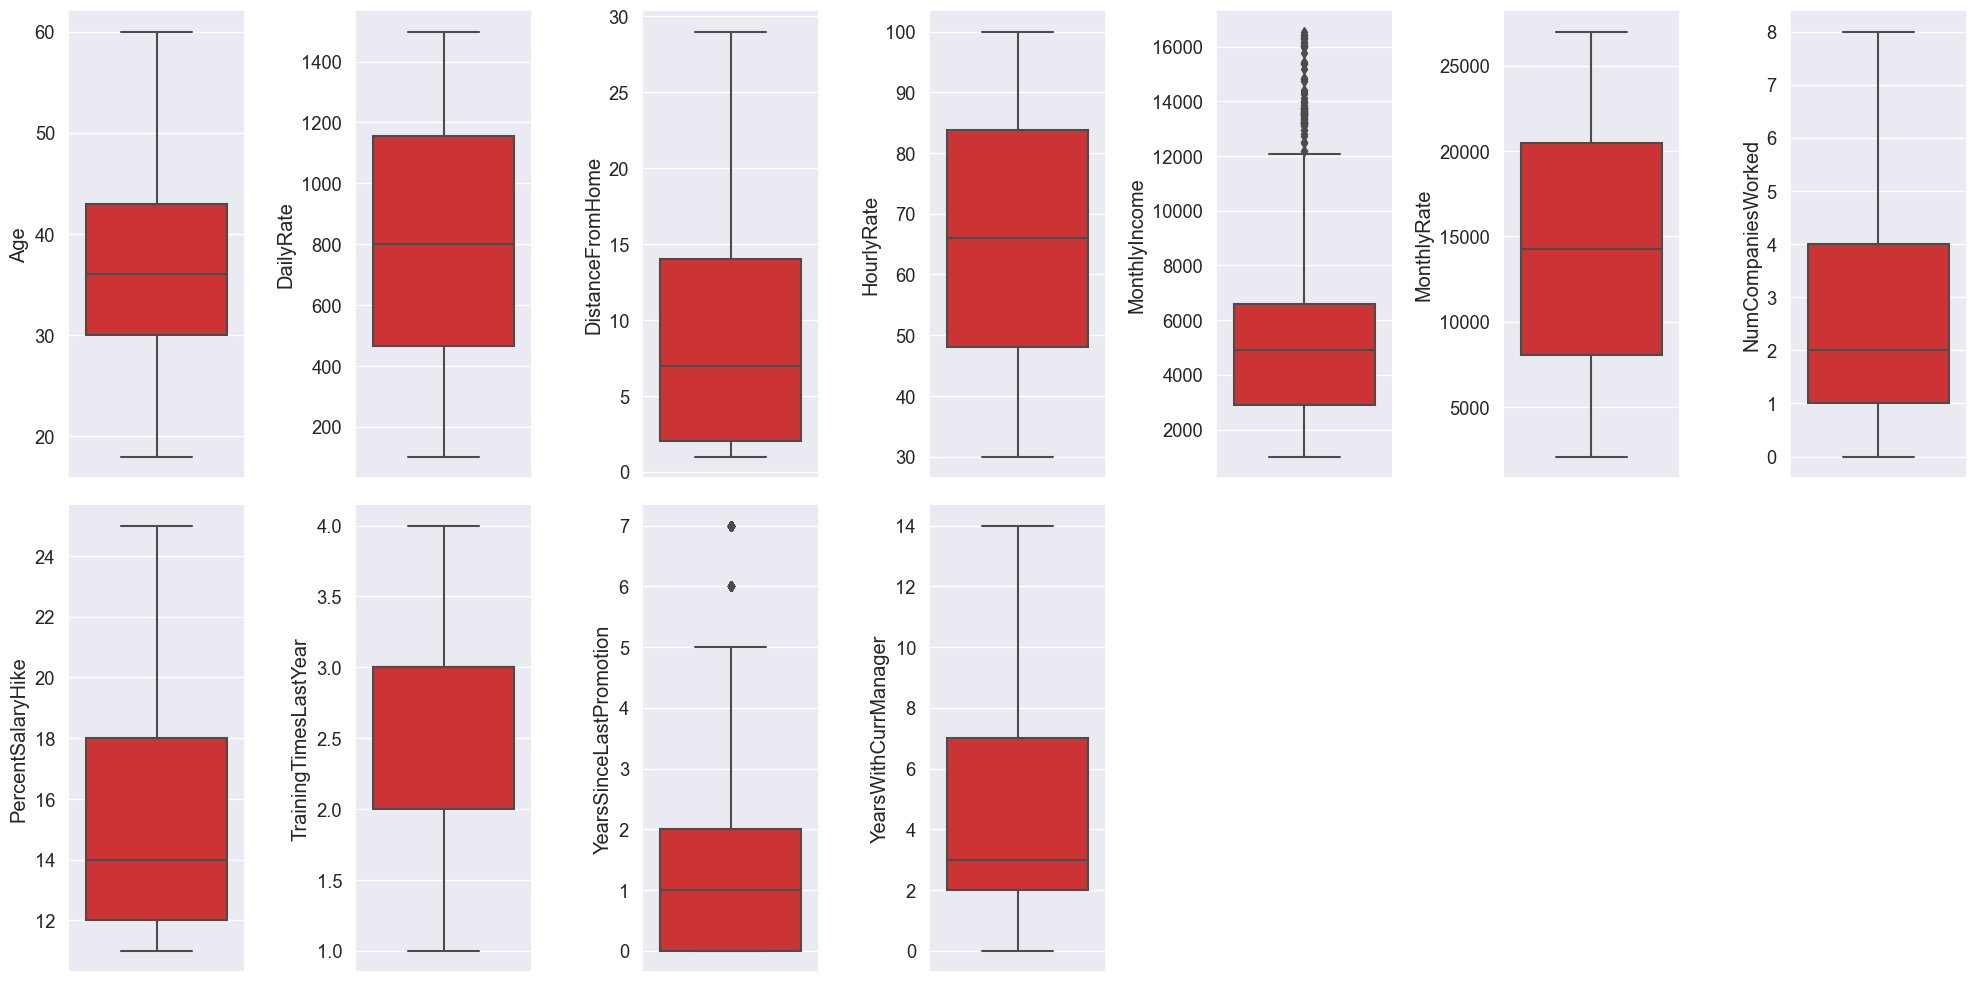

In [32]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
        plt.subplot(3,7,i+1)
        sns.boxplot(y=df[j])
        plt.tight_layout()

## __FEATURE TRANSFORMATION__

### __FEATURE SCALING__

Waktu terbaik untuk menggunakan normalisasi adalah ketika distribusi datanya tidak normal, sementara standarisasi digunakan ketika distribusi datanya normal

[Source](https://becominghuman.ai/what-does-feature-scaling-mean-when-to-normalize-data-and-when-to-standardize-data-c3de654405ed)

Oleh karena itu kita akan melakukan pengujian `Shapiro` untuk mengetahui apakah suatu data memiliki distribusi normal atau tidak

[Source](https://sasongko.web.id/post/2021-05-02-uji-normalitas-python/)

In [33]:
from scipy.stats import shapiro

for i in df.select_dtypes('number'):
        if shapiro(df[i])[1]<0.05:  #signifikansi alpha 5%
                print(i, "Tidak normal")
        else:
                print(i,'Normal')



Age Tidak normal
DailyRate Tidak normal
DistanceFromHome Tidak normal
HourlyRate Tidak normal
MonthlyIncome Tidak normal
MonthlyRate Tidak normal
NumCompaniesWorked Tidak normal
PercentSalaryHike Tidak normal
TrainingTimesLastYear Tidak normal
YearsSinceLastPromotion Tidak normal
YearsWithCurrManager Tidak normal


Karena semua kolom tidak memiliki distribusi normal, maka kita akan melakukan scaling menggunakan normalisasi

In [34]:
from sklearn.preprocessing import MinMaxScaler

for i in df.select_dtypes('number'):
        df[i] = MinMaxScaler().fit_transform(df[[i]])

In [35]:
#mengubah kembali tipe data yang tidak sesuai
for i in ['Education','EnvironmentSatisfaction','JobLevel','JobSatisfaction','PerformanceRating','JobInvolvement','RelationshipSatisfaction','WorkLifeBalance','StockOptionLevel']:
        df[i] = df[i].astype(int)

### __FEATURE ENCODING__

In [36]:
for i in df.select_dtypes('object').columns:
        print(df[i].value_counts(),'\n')

No     1233
Yes     237
Name: Attrition, dtype: int64 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

Male      882
Female    588
Name: Gender, dtype: int64 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64 

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 

No     1054
Yes     416
Name: OverTime, dtype: int64 



Kolom kategorical yg memiliki unique value 2 dan bertipe ordinal akan menggunakan Label Encoding, semenntara yang bertipe nominal akan menggunakan one hot encoding

- Kolom `EducationField`, `JobRole`, `BusinessTravel`.`Department`,`MaritalStatus` akan menggunakan OneHots encoding

- Kolom  `Attrition`, `Gender`, `Overtime` akan menggugnakan label encoding  

In [37]:
df['Attrition'] = df['Attrition'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['OverTime'] = df['OverTime'].astype('category').cat.codes

In [38]:
# OneHots Encode EducationField, JobRole 
for cat in ['EducationField', 'JobRole','BusinessTravel','Department','MaritalStatus']:
    OneHots = pd.get_dummies(df[cat], prefix = cat)
    df = df.join(OneHots)

In [39]:
# drop kolom kategori yang asli (karena sudah di-encoding)
df = df.drop(columns=['EducationField', 'JobRole','BusinessTravel','Department','MaritalStatus'])

## __HANDLE CLASS IMBALANCE__

Pada dataset ini kolom Attrition memiliki perbandingan 16:84. Menurut sumber 16% termasuk dalam kategori moderate. Oleh karena itu kita akan melakukan balancing data dengan menggunakan oversampling SMOTE

[Source](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

In [40]:
#memisahkan kolom fitur dan target
x = df.drop('Attrition', axis=1)
y = df['Attrition']

print('Before\n',df['Attrition'].value_counts())

from imblearn import over_sampling
x, y = over_sampling.SMOTE().fit_resample(x,y)
df = x.join(y)

print('\nAfter\n',df['Attrition'].value_counts())


Before
 0    1233
1     237
Name: Attrition, dtype: int64

After
 1    1233
0    1233
Name: Attrition, dtype: int64


## __FEATURE SELECTION__

Pada tahap ini kami akan membuang salah satu kolom yang memiliki corelasi > 0.7 yang kemungkinan akan redundan dan menyebabkan multikolinearity

<AxesSubplot: >

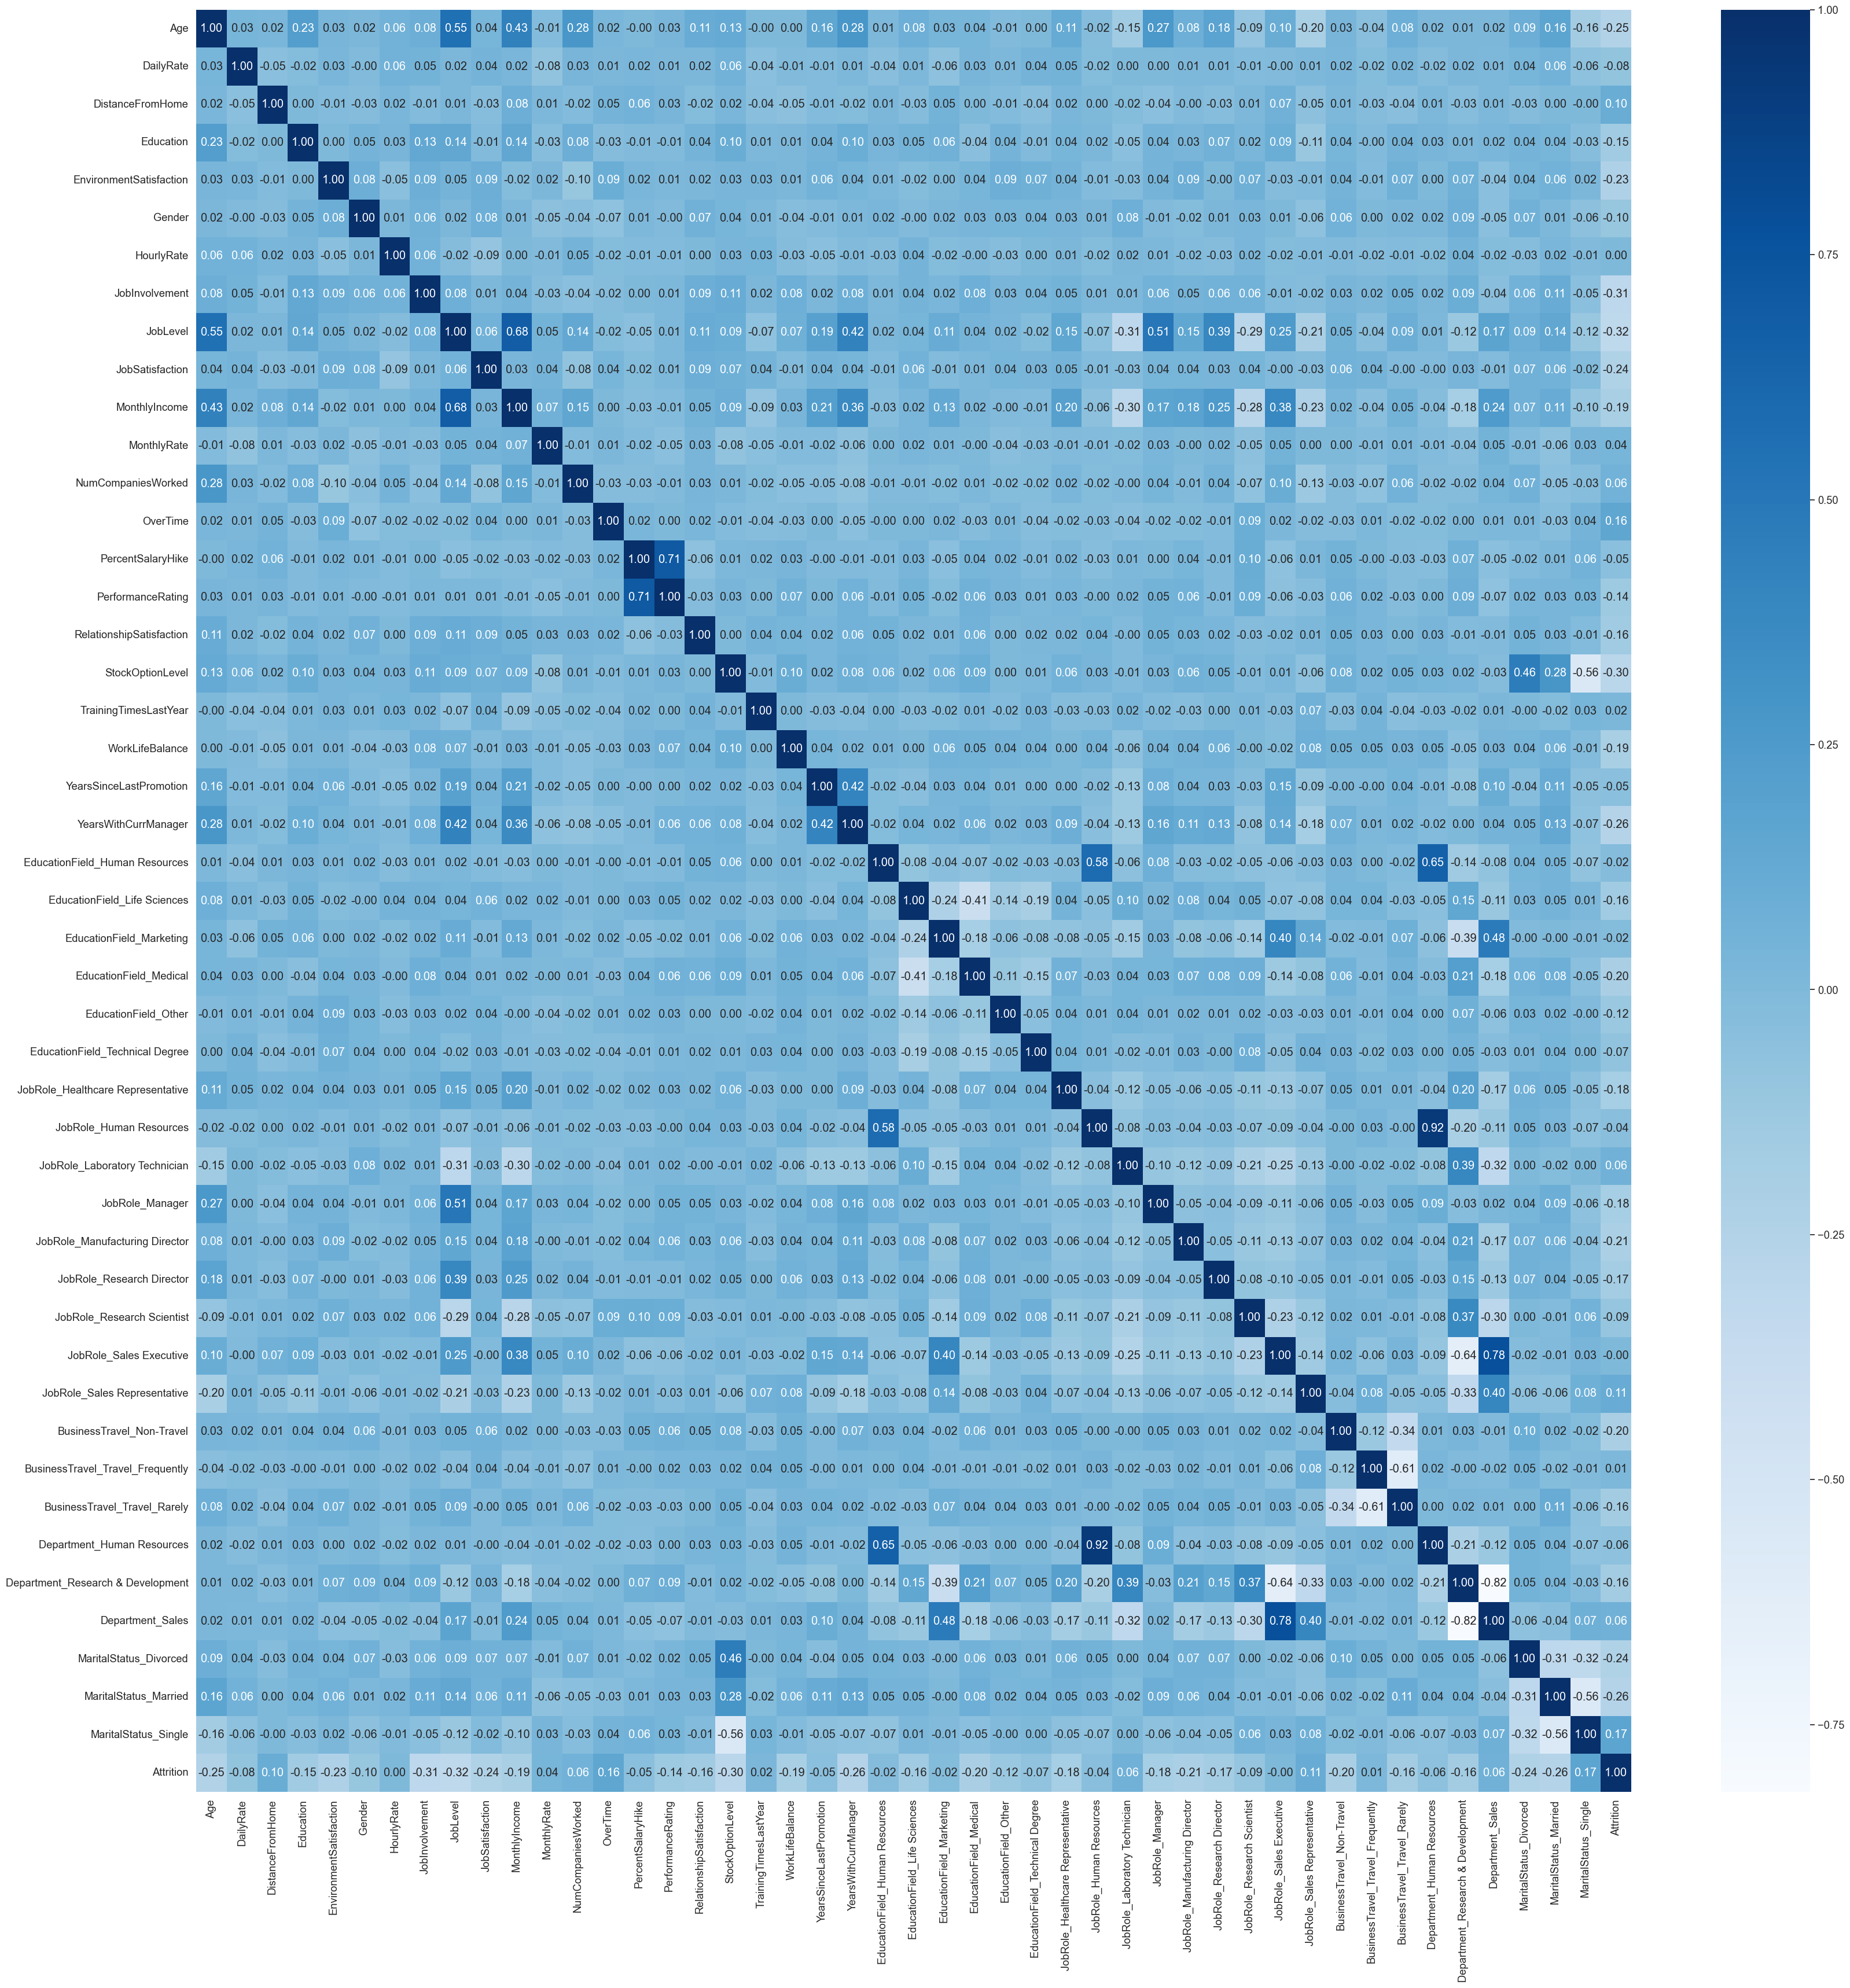

In [41]:
plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

PercentSallaryHike, JobRole_Human Resources, JobRole_Sales Executive, Department_Sales adalah kolom yang berkorelasi lebih dari 0.7 dengan kolom lain dan akan di drop

In [42]:
drop_columns = ['PercentSalaryHike', 'JobRole_Human Resources', 'JobRole_Sales Executive', 'Department_Sales']

In [43]:
df = df.drop(drop_columns, axis=1)

Selanjutnya kami akan melakukan feature selection dengan menggunakan chi square untuk memilih top 20 fitur terbaik

[Referensi](https://notebook.community/jaganadhg/data_science_notebooks/sklearn/scikit_learn_feature_selection)

In [44]:
from sklearn import datasets
from sklearn.feature_selection import f_classif #seleksi fitur dg anova
from sklearn.feature_selection import SelectKBest

#split fitur dan target
x = df.drop('Attrition', axis=1)
y = df['Attrition']

anova = SelectKBest(score_func=f_classif, k=20) #ambil top 20 fitur terbaik
anova.fit(x,y)


selected = pd.DataFrame()
selected['Fitur'] = x.columns
selected['F1'] = anova.scores_
selected['P Value'] = anova.pvalues_
selected['Support'] = anova.get_support()

#tampilkan top 20 fitur terbaik
selected.sort_values(['F1','P Value'], ascending=[False,False])


,Fitur,F1,P Value,Support
8,JobLevel,282.078708,5.077809e-60,True
7,JobInvolvement,258.807554,1.887570e-55,True
16,StockOptionLevel,235.247668,8.798454e-51,True
40,MaritalStatus_Married,179.328381,1.581641e-39,True
20,YearsWithCurrManager,177.927388,3.050248e-39,True
0,Age,162.495698,4.334832e-36,True
9,JobSatisfaction,149.331781,2.199880e-33,True
39,MaritalStatus_Divorced,147.637981,4.915893e-33,True
4,EnvironmentSatisfaction,140.577434,1.412467e-31,True
30,JobRole_Manufacturing Director,117.170766,1.040094e-26,True


In [45]:
#ambil top 20 fitur
best = selected[selected['Support']==True]['Fitur'].to_list()

x = x[best]

## FEATURE EXTRACTION
Tidak ada Feature baru yang ditambahkan, data yang dimiliki dirasa cukup untuk melakukan Model

## FEATURE TAMBAHAN

- `Stress Level` akan sangat membantu ketika mengetahui tingkat stress karyawan dalam melakukan pekerjaan, sehingga kita bisa paham, apakah perusahaan ini memiliki tingkat stress yang tinggi atau tidak
- `Health` alasan kesehatan biasanya menjadi salah satu faktor pergi atau tidaknya seorang karyawan
- `Companyinfrastructure` biasanya hal ini juga jadi pertimbangan karyawan untuk menetap atau pindah kantor
- `Appreciation` kadang hal seperti apresiasi menajdi hal yang membuat betah di suatu lingkungan. 

In [46]:
df = x.join(y)
df.to_csv('Preprocessed.csv', index=False)